<a href="https://colab.research.google.com/github/sai-sreekhar/ML-Learning/blob/main/NextWordGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [19]:
file = open("data.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)

print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


**DATA** **CLEANING**

In [20]:
data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [21]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [22]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)

data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [24]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [25]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [26]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [27]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [28]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             26170     
                                                                 
 lstm_1 (LSTM)               (None, 1, 1000)           4044000   
                                                                 
 lstm_2 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [33]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

In [ ]:
history = model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 0.6292
Epoch 1: loss did not improve from 0.62614
61/61 [==============================] - 22s 359ms/step - loss: 0.6292 - lr: 1.0000e-04
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 0.6258
Epoch 2: loss improved from 0.62614 to 0.62577, saving model to nextword1.h5
61/61 [==============================] - 20s 334ms/step - loss: 0.6258 - lr: 1.0000e-04
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 0.6263
Epoch 3: loss did not improve from 0.62577
61/61 [==============================] - 20s 332ms/step - loss: 0.6263 - lr: 1.0000e-04
Epoch 4/150
61/61 [==============================] - ETA: 0s - loss: 0.6269
Epoch 4: loss did not improve from 0.62577
61/61 [==============================] - 19s 317ms/step - loss: 0.6269 - lr: 1.0000e-04
Epoch 5/150
61/61 [==============================] - ETA: 0s - loss: 0.6245
Epoch 5: loss improved from 0.62577 to 0.62448, saving model t

In [75]:
import tensorflow as tf

# Extract the training history metrics
training_history = history.history

# Get the list of metric names
metric_names = list(training_history.keys())
print(metric_names)
lossArr = []
epochArr = []
for i in range(1,151):
  epochArr.append(i)

print(epochArr)
# Iterate over the metric names and retrieve the metric values for each epoch
for metric_name in metric_names:
    metric_values = training_history[metric_name]
    for epoch, value in enumerate(metric_values, start=1):
        print(f"Epoch {epoch}: {metric_name} = {value}")
        if(metric_name == "loss"):
          lossArr.append(value)

print(lossArr)

['loss', 'lr']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]
Epoch 1: loss = 0.6314947605133057
Epoch 2: loss = 0.628524899482727
Epoch 3: loss = 0.6268926858901978
Epoch 4: loss = 0.6261772513389587
Epoch 5: loss = 0.6261389851570129
Epoch 1: lr = 9.999999747378752e-05
Epoch 2: lr = 9.999999747378752e-05
Epoch 3: lr = 9.999999747378752e-05
Epoch 4: lr = 9.999999747378752e-05
Epoch 5: lr = 9.99999974

In [76]:
# def calculate_epoch_frequencies(training_history):
#     epochs = []
#     frequencies = []

#     # Extract epochs and their frequencies from the training history
#     for epoch, metrics in enumerate(training_history, start=1):
#         print(epoch,metrics)
#         epochs.append(epoch)
#         frequencies.append(metrics['frequency'])  # Assuming 'frequency' is the metric you want to track

#     return epochs, frequencies
# calculate_epoch_frequencies(training_history)

1 loss


TypeError: ignored

ValueError: ignored

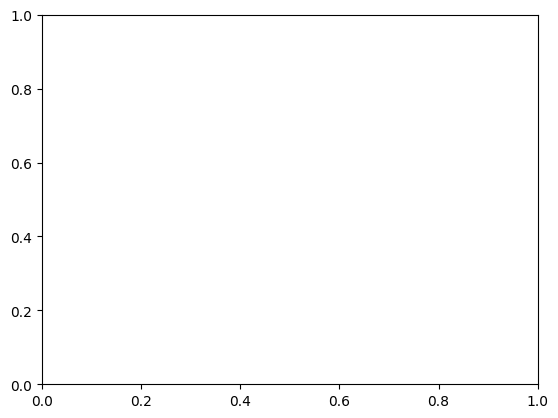

In [77]:
import matplotlib.pyplot as plt

def create_epoch_frequency_graph(epochs, frequencies):
    # Plot the epoch frequency graph
    plt.bar(epochs, frequencies)
    plt.xlabel('Epochs')
    plt.ylabel('Frequency')
    plt.title('Epoch Frequency during Training')
    plt.show()

create_epoch_frequency_graph(epochArr,lossArr)



In [43]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)

        preds = model.predict_classes(sequence)
        predicted_word = ""

        for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break

        print(predicted_word)
        return predicted_word

In [44]:
while(True):

    text = input("Enter your line: ")

    if text == "stop the script":
        print("Ending The Program.....")
        break

    else:
        try:
            text = text.split(" ")
            text = text[-1]

            text = ''.join(text)
            Predict_Next_Words(model, tokenizer, text)

        except:
            continue


Enter your line: at the dull
Enter your line: stop the script
Ending The Program.....
